In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% ! important; }<style>"))

/var/folders/m5/t9zr6cks3_5_11h7rhn_zb_h0000gn/T/ipykernel_76176/333272003.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
years = list(range(2000,2023))

In [3]:
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [4]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_ratings.html"

In [5]:
import requests

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    # Write as csv 
    with open("nba_stats_standing/{}.html".format(year),"w+") as f:
        f.write(data.text)

In [6]:
from bs4 import BeautifulSoup

In [7]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [8]:
dfs = []
for year in years:
    with open("nba_stats_standing/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    ratings_table = soup.find(id="ratings")
    ratings = pd.read_html(str(ratings_table))[0]
    ratings["Year"] = year
    
    dfs.append(ratings)

In [9]:
nba_ratings = pd.concat(dfs)
nba_ratings.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


Include markdown for context (title and point form)

In [10]:
nba_ratings["Year"].value_counts().sort_index()

2000    29
2001    29
2002    29
2003    29
2004    29
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
2013    30
2014    30
2015    30
2016    30
2017    30
2018    30
2019    30
2020    30
2021    30
2022    30
Name: Year, dtype: int64

In [11]:
nba_ratings.to_csv("nba_ratings.csv", index= False )

In [12]:
url_start_2 = "https://www.basketball-reference.com/playoffs/"

In [13]:
import requests

data = requests.get(url_start_2)
with open("nba_champions/list.html","w+") as f :
    f.write(data.text)


In [14]:
dfs = []

with open("nba_champions/list.html") as f :
    page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    soup.find('tr', class_="over_header").decompose()
    champs_table = soup.find(id="div_champions_index")
    champs = pd.read_html(str(champs_table))[0]
    
    dfs.append(champs)

nba_champs = pd.concat(dfs)
nba_champs.to_csv("nba_champs.csv", index = False)

In [15]:
nba_champs

,Year,Lg,Champion,Runner-Up,Finals MVP,Unnamed: 5,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,NaN,J. Tatum (552),A. Horford (185),J. Tatum (131),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,NaN,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,NaN,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,NaN,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,NaN,L. James (748),D. Green (222),L. James (198),L. James (5.2)
...,...,...,...,...,...,...,...,...,...,...
84,1951.0,NBA,Rochester Royals,New York Knicks,NaN,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
85,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
86,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
87,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [16]:
df = pd.read_csv('nba_ratings.csv')
df.head()

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,P,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
1,2,Portland Trail Blazers,W,P,59,23,0.720,6.40,108.75,101.67,7.08,6.37,108.71,101.68,7.03,2000
2,3,San Antonio Spurs,W,M,53,29,0.646,5.94,105.83,99.45,6.38,5.93,105.67,99.30,6.37,2000
3,4,Phoenix Suns,W,P,53,29,0.646,5.22,105.04,99.66,5.38,5.24,104.90,99.48,5.41,2000
4,5,Utah Jazz,W,M,55,27,0.671,4.46,107.97,103.09,4.88,4.52,108.00,103.06,4.94,2000


In [17]:
df_champs = pd.read_csv('nba_champs.csv')
df_champs.drop(labels=["Unnamed: 5"], axis=1, inplace = True)
df_champs.head()

,Year,Lg,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,NaN,NaN,NaN,J. Tatum (552),A. Horford (185),J. Tatum (131),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)


In [18]:
len(df_champs)

89

In [19]:
df_champs.isnull().all(axis = 1).value_counts()

False    85
True      4
dtype: int64

In [20]:
df_champs.dropna(how='all', inplace = True)

In [21]:
len(df_champs)

85

In [22]:
df_champs = df_champs.loc[df_champs["Year"] >= 2000]
print(df_champs["Year"].min())
print(df_champs["Year"].max())

2000.0
2022.0


In [23]:
df_champs["Lg"].value_counts()

NBA    23
Name: Lg, dtype: int64

In [24]:
df.drop(labels="Div", axis=1, inplace = True)
df_champs.drop(labels="Lg", axis=1, inplace = True)

In [25]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [27]:
df_champs["Year"] = df_champs["Year"].astype('int')
df_champs

,Year,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2022,NaN,NaN,NaN,J. Tatum (552),A. Horford (185),J. Tatum (131),J. Butler (3.8)
1,2021,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
5,2017,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
6,2016,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
7,2015,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
8,2014,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)
9,2013,Miami Heat,San Antonio Spurs,L. James,L. James (596),T. Duncan (214),L. James (152),L. James (5.2)


In [28]:
df.sort_values( by = "Year" , inplace = True)

In [29]:
df

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
0,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000
28,29,Los Angeles Clippers,W,15,67,0.183,-11.52,98.61,110.91,-12.30,-10.73,99.00,110.44,-11.45,2000
27,28,Chicago Bulls,E,17,65,0.207,-9.40,95.50,105.93,-10.43,-9.23,95.42,105.65,-10.23,2000
26,27,Golden State Warriors,W,19,63,0.232,-8.27,100.40,109.04,-8.64,-7.62,100.70,108.65,-7.96,2000
25,26,Atlanta Hawks,E,28,54,0.341,-5.38,102.68,108.46,-5.78,-5.41,102.68,108.50,-5.82,2000
24,25,Vancouver Grizzlies,W,22,60,0.268,-5.62,103.34,109.50,-6.17,-5.10,103.66,109.26,-5.60,2000
23,24,Cleveland Cavaliers,E,32,50,0.390,-3.50,101.04,104.85,-3.81,-3.64,100.87,104.83,-3.96,2000
22,23,Washington Wizards,E,29,53,0.354,-3.28,104.29,107.71,-3.42,-3.47,104.30,107.92,-3.62,2000
20,21,New Jersey Nets,E,31,51,0.378,-1.04,105.93,107.12,-1.19,-1.18,105.98,107.31,-1.33,2000
19,20,Boston Celtics,E,35,47,0.427,-0.76,105.41,106.26,-0.85,-1.00,105.46,106.57,-1.11,2000


In [30]:
df_champs

,Year,Champion,Runner-Up,Finals MVP,Points,Rebounds,Assists,Win Shares
0,2022,NaN,NaN,NaN,J. Tatum (552),A. Horford (185),J. Tatum (131),J. Butler (3.8)
1,2021,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020,Los Angeles Lakers,Miami Heat,L. James,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019,Toronto Raptors,Golden State Warriors,K. Leonard,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (748),D. Green (222),L. James (198),L. James (5.2)
5,2017,Golden State Warriors,Cleveland Cavaliers,K. Durant,L. James (591),K. Love (191),L. James (141),L. James (4.3)
6,2016,Cleveland Cavaliers,Golden State Warriors,L. James,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
7,2015,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
8,2014,San Antonio Spurs,Miami Heat,K. Leonard,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)
9,2013,Miami Heat,San Antonio Spurs,L. James,L. James (596),T. Duncan (214),L. James (152),L. James (5.2)


In [31]:
dict_champs = {}
for x in df_champs.index :
    row = df_champs.loc[x]
    year = row["Year"]
    champ = row["Champion"]
    dict_champs[year] = champ

In [32]:
champ_list = []
for x in df.index:
    row = df.loc[x]
    year = row["Year"]
    team = row["Team"]
    if (team == dict_champs[year]):
        champ_list.append(True)
    else:
        champ_list.append(False)
df["Champion"] = champ_list
df.head()

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year,Champion
0,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000,True
28,29,Los Angeles Clippers,W,15,67,0.183,-11.52,98.61,110.91,-12.30,-10.73,99.00,110.44,-11.45,2000,False
27,28,Chicago Bulls,E,17,65,0.207,-9.40,95.50,105.93,-10.43,-9.23,95.42,105.65,-10.23,2000,False
26,27,Golden State Warriors,W,19,63,0.232,-8.27,100.40,109.04,-8.64,-7.62,100.70,108.65,-7.96,2000,False
25,26,Atlanta Hawks,E,28,54,0.341,-5.38,102.68,108.46,-5.78,-5.41,102.68,108.50,-5.82,2000,False


In [33]:
dict_runnerup = {}
for x in df_champs.index :
    row = df_champs.loc[x]
    year = row["Year"]
    runnerup = row["Runner-Up"]
    dict_runnerup[year] = runnerup
print(dict_runnerup)

{2022: nan, 2021: 'Phoenix Suns', 2020: 'Miami Heat', 2019: 'Golden State Warriors', 2018: 'Cleveland Cavaliers', 2017: 'Cleveland Cavaliers', 2016: 'Golden State Warriors', 2015: 'Cleveland Cavaliers', 2014: 'Miami Heat', 2013: 'San Antonio Spurs', 2012: 'Oklahoma City Thunder', 2011: 'Miami Heat', 2010: 'Boston Celtics', 2009: 'Orlando Magic', 2008: 'Los Angeles Lakers', 2007: 'Cleveland Cavaliers', 2006: 'Dallas Mavericks', 2005: 'Detroit Pistons', 2004: 'Los Angeles Lakers', 2003: 'New Jersey Nets', 2002: 'New Jersey Nets', 2001: 'Philadelphia 76ers', 2000: 'Indiana Pacers'}


In [34]:
runnerup_list = []
for x in df.index:
    row = df.loc[x]
    year = row["Year"]
    team = row["Team"]
    if (team == dict_champs[year] or team == dict_runnerup[year]):
        runnerup_list.append(True)
    else:
        runnerup_list.append(False)
df["Final"] = runnerup_list
df.loc[df["Year"] == 2000]

,Rk,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year,Champion,Final
0,1,Los Angeles Lakers,W,67,15,0.817,8.55,107.85,98.79,9.05,8.41,107.66,98.75,8.92,2000,True,True
28,29,Los Angeles Clippers,W,15,67,0.183,-11.52,98.61,110.91,-12.30,-10.73,99.00,110.44,-11.45,2000,False,False
27,28,Chicago Bulls,E,17,65,0.207,-9.40,95.50,105.93,-10.43,-9.23,95.42,105.65,-10.23,2000,False,False
26,27,Golden State Warriors,W,19,63,0.232,-8.27,100.40,109.04,-8.64,-7.62,100.70,108.65,-7.96,2000,False,False
25,26,Atlanta Hawks,E,28,54,0.341,-5.38,102.68,108.46,-5.78,-5.41,102.68,108.50,-5.82,2000,False,False
24,25,Vancouver Grizzlies,W,22,60,0.268,-5.62,103.34,109.50,-6.17,-5.10,103.66,109.26,-5.60,2000,False,False
23,24,Cleveland Cavaliers,E,32,50,0.390,-3.50,101.04,104.85,-3.81,-3.64,100.87,104.83,-3.96,2000,False,False
22,23,Washington Wizards,E,29,53,0.354,-3.28,104.29,107.71,-3.42,-3.47,104.30,107.92,-3.62,2000,False,False
20,21,New Jersey Nets,E,31,51,0.378,-1.04,105.93,107.12,-1.19,-1.18,105.98,107.31,-1.33,2000,False,False
19,20,Boston Celtics,E,35,47,0.427,-0.76,105.41,106.26,-0.85,-1.00,105.46,106.57,-1.11,2000,False,False


<AxesSubplot:xlabel='Year', ylabel='W/L%'>

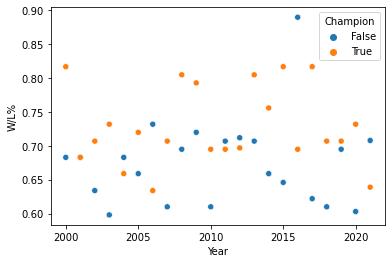

In [35]:
df_onlyfinal = df.loc[(df["Final"] == True) ] #only get teams who go to finals
# df_onlyfinal.sort_values(by =['Year','W'], ascending=False) # only 4/17 Teams that went to the finals and won when their W/L% < = 0.683 total is more than  Thus i will remove as those teams that won are outlier
# df_onlyfinal.groupby(['Rk'])['Champion'].count()
sns.scatterplot(x=df_onlyfinal["Year"], y=df_onlyfinal['W/L%'], hue=df_onlyfinal['Champion'])

In [36]:
df.corr()

,Rk,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year,Champion,Final
Rk,1.000000,-0.935137,0.931708,-0.950267,-0.969389,-0.594152,0.562169,-0.970554,-0.972623,-0.576049,0.557766,-0.973710,0.016880,-0.261639,-0.340295
W,-0.935137,1.000000,-0.936449,0.983846,0.951464,0.568215,-0.566947,0.952233,0.948696,0.549659,-0.556359,0.949318,-0.058300,0.272291,0.346559
L,0.931708,-0.936449,1.000000,-0.980974,-0.948047,-0.615413,0.514129,-0.949458,-0.944777,-0.596767,0.502987,-0.946078,-0.058706,-0.274796,-0.348873
W/L%,-0.950267,0.983846,-0.980974,1.000000,0.967719,0.601466,-0.551759,0.968324,0.964929,0.582697,-0.540853,0.965400,-0.002071,0.277679,0.353550
MOV,-0.969389,0.951464,-0.948047,0.967719,1.000000,0.621185,-0.568381,0.998842,0.996671,0.601545,-0.556900,0.995414,-0.002060,0.274361,0.345524
ORtg,-0.594152,0.568215,-0.615413,0.601466,0.621185,1.000000,0.290059,0.620482,0.628595,0.999209,0.299608,0.627993,0.519564,0.140592,0.192580
DRtg,0.562169,-0.566947,0.514129,-0.551759,-0.568381,0.290059,1.000000,-0.570529,-0.556655,0.313354,0.996203,-0.558546,0.546487,-0.186056,-0.218971
NRtg,-0.970554,0.952233,-0.949458,0.968324,0.998842,0.620482,-0.570529,1.000000,0.995589,0.600713,-0.559221,0.996623,-0.001966,0.273109,0.344681
MOV/A,-0.972623,0.948696,-0.944777,0.964929,0.996671,0.628595,-0.556655,0.995589,1.000000,0.610402,-0.551713,0.998862,-0.002166,0.273743,0.340683
ORtg/A,-0.576049,0.549659,-0.596767,0.582697,0.601545,0.999209,0.313354,0.600713,0.610402,1.000000,0.322317,0.609672,0.520377,0.134048,0.185018


<AxesSubplot:xlabel='W/L%', ylabel='NRtg'>

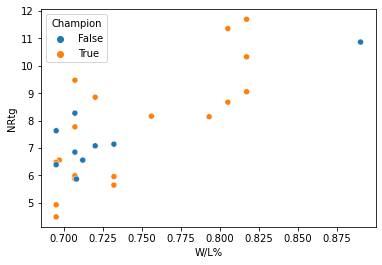

In [37]:
df_highrelation = df_onlyfinal.loc[(df_onlyfinal["W/L%"] > 0.683) ]
sns.scatterplot(x=df_highrelation["W/L%"], y=df_highrelation['NRtg'], hue=df_highrelation['Champion']) 
# A Team with a NRtg > 8 and W/L% > 0.775 majority won the championship

<AxesSubplot:xlabel='W/L%', ylabel='NRtg'>

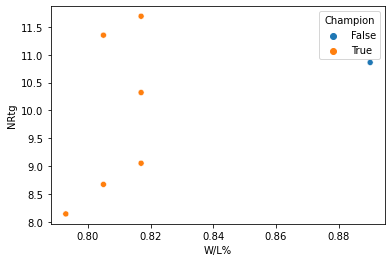

In [38]:
df_highrelation = df_highrelation.loc[(df_highrelation["W/L%"] > 0.775) & (df_highrelation["NRtg"] > 0.775)]
sns.scatterplot(x=df_highrelation["W/L%"], y=df_highrelation['NRtg'], hue=df_highrelation['Champion']) 

In [39]:
print(len(df_highrelation.loc[df_highrelation["Champion"]== True])/len(df_highrelation.loc[df_highrelation["Final"]== True])*100)

85.71428571428571


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.drop(columns = ["Champion"])
y = df["Champion"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

score = accuracy_score(y_test, predictions)

ValueError: could not convert string to float: 'Philadelphia 76ers'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib


x = df.drop(columns = ["Champion"])
y = df["Champion"]
x_train, x_test, y_train, y_test = train_test_splite(x, y, test_size = 0.2)

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

jonlib.dump(model, 'nba-predicition.joblib')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

model= joblib.load('nba-predicition.joblib')
predictions = model.predict( [[1,"Boston Celtics"]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

x = df.drop(columns = ["Champion"])
y = df["Champion"]

model = DecisionTreeClassifier()
model.fit(x,y)

tree.export_graphviz(model, out_file='nba-prediction.dot',
                    feature_names=['Rk','gender'],
                    class_names=sorted(y.unique()),
                    label = 'all',
                    rounded = True,
                    filled = True)